In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import zscore

In [28]:
df = pd.read_csv("C:/Users/hp/Downloads/data/data/togo-dapaong_qc.csv") 

df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [4]:
#summary statistics
statistics = df.describe()


print(statistics)

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.2000

In [5]:
# Summary statistics for numeric columns
df[['GHI', 'DNI', 'DHI', 'Tamb']].describe()

,GHI,DNI,DHI,Tamb
count,525600.000000,525600.000000,525600.000000,525600.000000
mean,230.555040,151.258469,116.444352,27.751788
std,322.532347,250.956962,156.520714,4.758023
min,-12.700000,0.000000,0.000000,14.900000
25%,-2.200000,0.000000,0.000000,24.200000
50%,2.100000,0.000000,2.500000,27.200000
75%,442.400000,246.400000,215.700000,31.100000
max,1424.000000,1004.500000,805.700000,41.400000


In [6]:
#Data quality check

# Check for missing values
df.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [7]:
# Check for duplicates
df.duplicated().sum()

0

In [12]:
outliers = (zscores > 3).any(axis=1)
outliers = (zscores.abs() > 3).any(axis=1)
outliers.sum()

4714

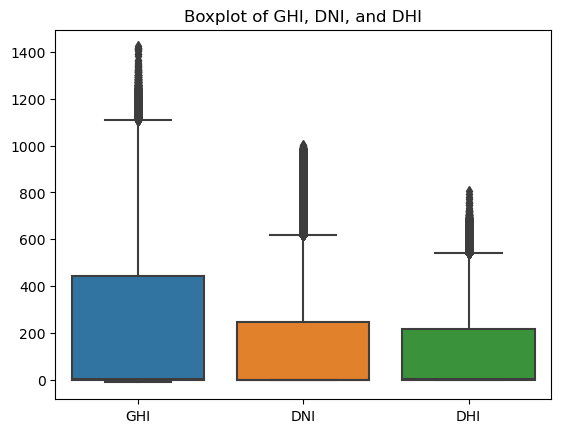

In [8]:
sns.boxplot(data=df[['GHI', 'DNI', 'DHI']])
plt.title('Boxplot of GHI, DNI, and DHI')
plt.show()

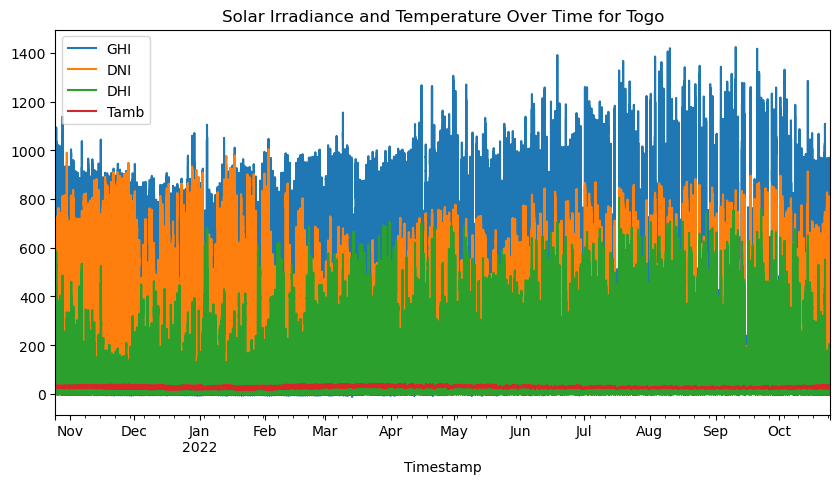

In [29]:
# Plotting time series trends for Togo dataset for the numeric columns
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)
df[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(10, 5), title='Solar Irradiance and Temperature Over Time for Togo')
plt.show()

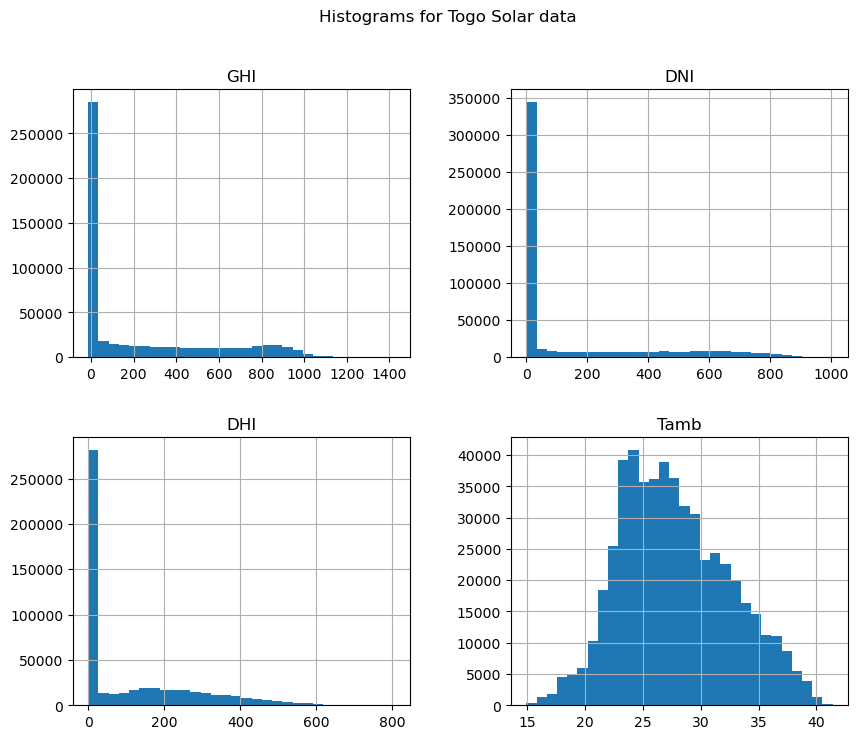

In [30]:
df[['GHI', 'DNI', 'DHI', 'Tamb']].hist(bins=30, figsize=(10, 8))
plt.suptitle('Histograms for Togo Solar data')
plt.show()

In [11]:
zscores = df[['GHI', 'DNI', 'DHI']].apply(zscore)
# zscores = df[['GHI', 'DNI', 'DHI', 'Tamb']].apply(zscore)
# zscores = df.apply(zscore)
zscores

,GHI,DNI,DHI
Timestamp,,,
2021-10-25 00:01:00,-0.718859,-0.602727,-0.743956
2021-10-25 00:02:00,-0.718859,-0.602727,-0.743956
2021-10-25 00:03:00,-0.718859,-0.602727,-0.743956
2021-10-25 00:04:00,-0.718549,-0.602727,-0.743956
2021-10-25 00:05:00,-0.718549,-0.602727,-0.743956
...,...,...,...
2022-10-24 23:56:00,-0.717309,-0.602727,-0.743956
2022-10-24 23:57:00,-0.717619,-0.602727,-0.743956
2022-10-24 23:58:00,-0.717929,-0.602727,-0.743956


<Axes: >

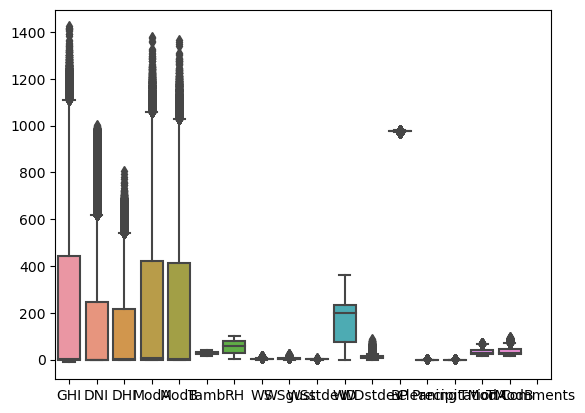

In [13]:
sns.boxplot(data=df)

In [14]:
# missing data forward fill
df.fillna(method='ffill', inplace=True)

In [15]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [16]:
#correlition analysis
correlation = df.corr()
correlation

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
GHI,1.000000,0.877006,0.851601,0.994948,0.995425,0.561232,-0.254597,0.418635,0.441086,0.396426,0.083140,0.476882,0.060820,0.024663,-0.034858,0.897945,0.919012,NaN
DNI,0.877006,1.000000,0.531475,0.889447,0.889452,0.503316,-0.325629,0.364054,0.382447,0.340702,-0.024641,0.395255,0.048865,0.019714,-0.031604,0.765348,0.783080,NaN
DHI,0.851601,0.531475,1.000000,0.832501,0.832110,0.488047,-0.150599,0.387028,0.407119,0.363018,0.147796,0.451398,0.054047,0.026119,-0.033599,0.801652,0.819751,NaN
ModA,0.994948,0.889447,0.832501,1.000000,0.999562,0.559820,-0.283801,0.417317,0.439764,0.395390,0.050099,0.470093,0.065885,0.022458,-0.034571,0.886586,0.906548,NaN
ModB,0.995425,0.889452,0.832110,0.999562,1.000000,0.554815,-0.276782,0.418524,0.440778,0.395811,0.054074,0.469665,0.070467,0.023418,-0.034526,0.885244,0.906177,NaN
Tamb,0.561232,0.503316,0.488047,0.559820,0.554815,1.000000,-0.396107,0.190635,0.214552,0.219601,0.086638,0.356389,-0.521044,0.019324,-0.060589,0.804866,0.739840,NaN
RH,-0.254597,-0.325629,-0.150599,-0.283801,-0.276782,-0.396107,1.000000,-0.137423,-0.120117,-0.061438,0.542563,-0.063580,0.223305,-0.006963,0.068915,-0.240227,-0.220004,NaN
WS,0.418635,0.364054,0.387028,0.417317,0.418524,0.190635,-0.137423,1.000000,0.977232,0.722844,0.149984,0.496355,0.092191,0.008210,0.099910,0.323350,0.348743,NaN
WSgust,0.441086,0.382447,0.407119,0.439764,0.440778,0.214552,-0.120117,0.977232,1.000000,0.823891,0.170364,0.553740,0.090504,0.009283,0.108393,0.352604,0.376198,NaN
WSstdev,0.396426,0.340702,0.363018,0.395390,0.395811,0.219601,-0.061438,0.722844,0.823891,1.000000,0.223824,0.584413,0.070786,0.010738,0.106046,0.340614,0.354939,NaN


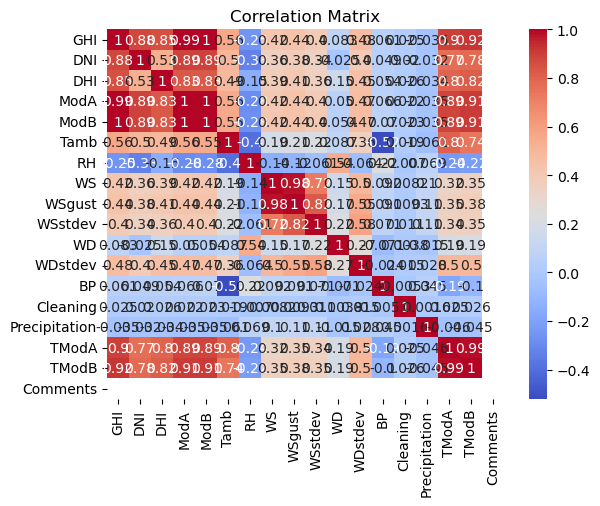

In [17]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

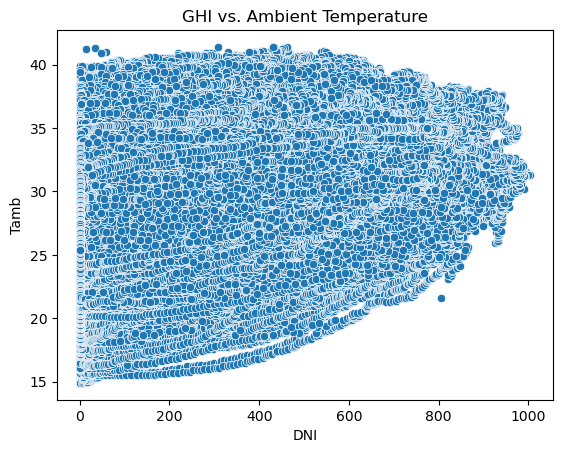

In [26]:
#scatter plot
sns.scatterplot(x='DNI', y='Tamb', data=df)
plt.title('GHI vs. Ambient Temperature')
plt.show()

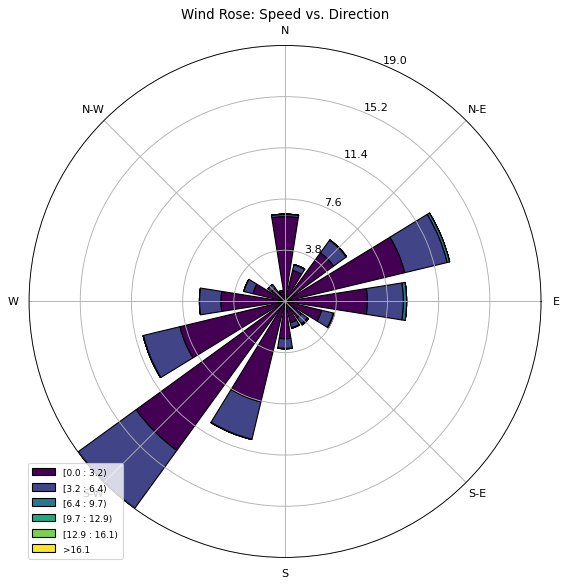

In [19]:
#wind analysis
from windrose import WindroseAxes

# Create a wind rose visualization to analyze speed and direction
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='black')
ax.set_title('Wind Rose: Speed vs. Direction')
ax.set_legend()
plt.show()

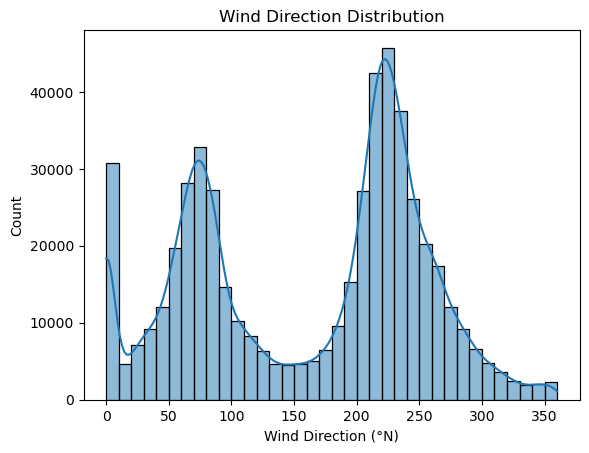

In [20]:
# Analyze wind direction variability
sns.histplot(df['WD'], kde=True, bins=36)
plt.title('Wind Direction Distribution')
plt.xlabel('Wind Direction (°N)')
plt.show()

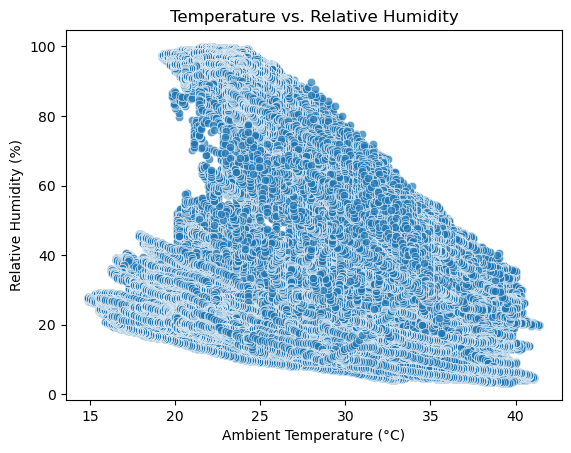

In [21]:
# Analyze the relationship between temperature and relative humidity
sns.scatterplot(x='Tamb', y='RH', data=df, alpha=0.7)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()

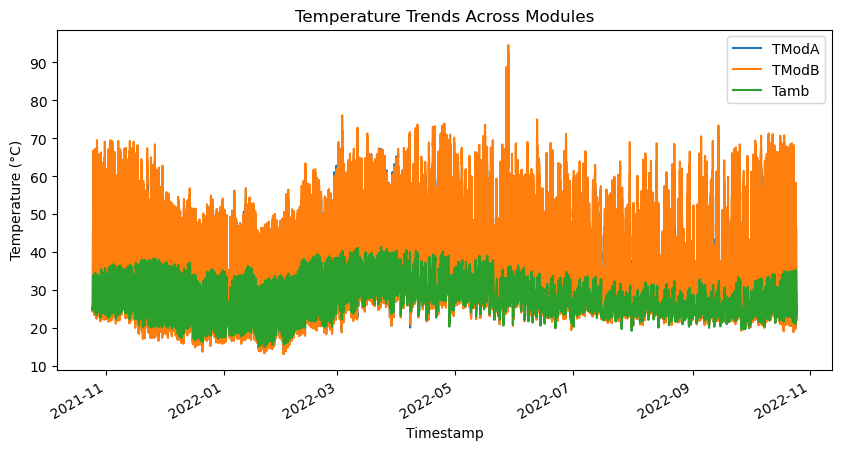

In [22]:
# Investigate temperature variations across modules
df[['TModA', 'TModB', 'Tamb']].plot(figsize=(10, 5))
plt.title('Temperature Trends Across Modules')
plt.ylabel('Temperature (°C)')
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


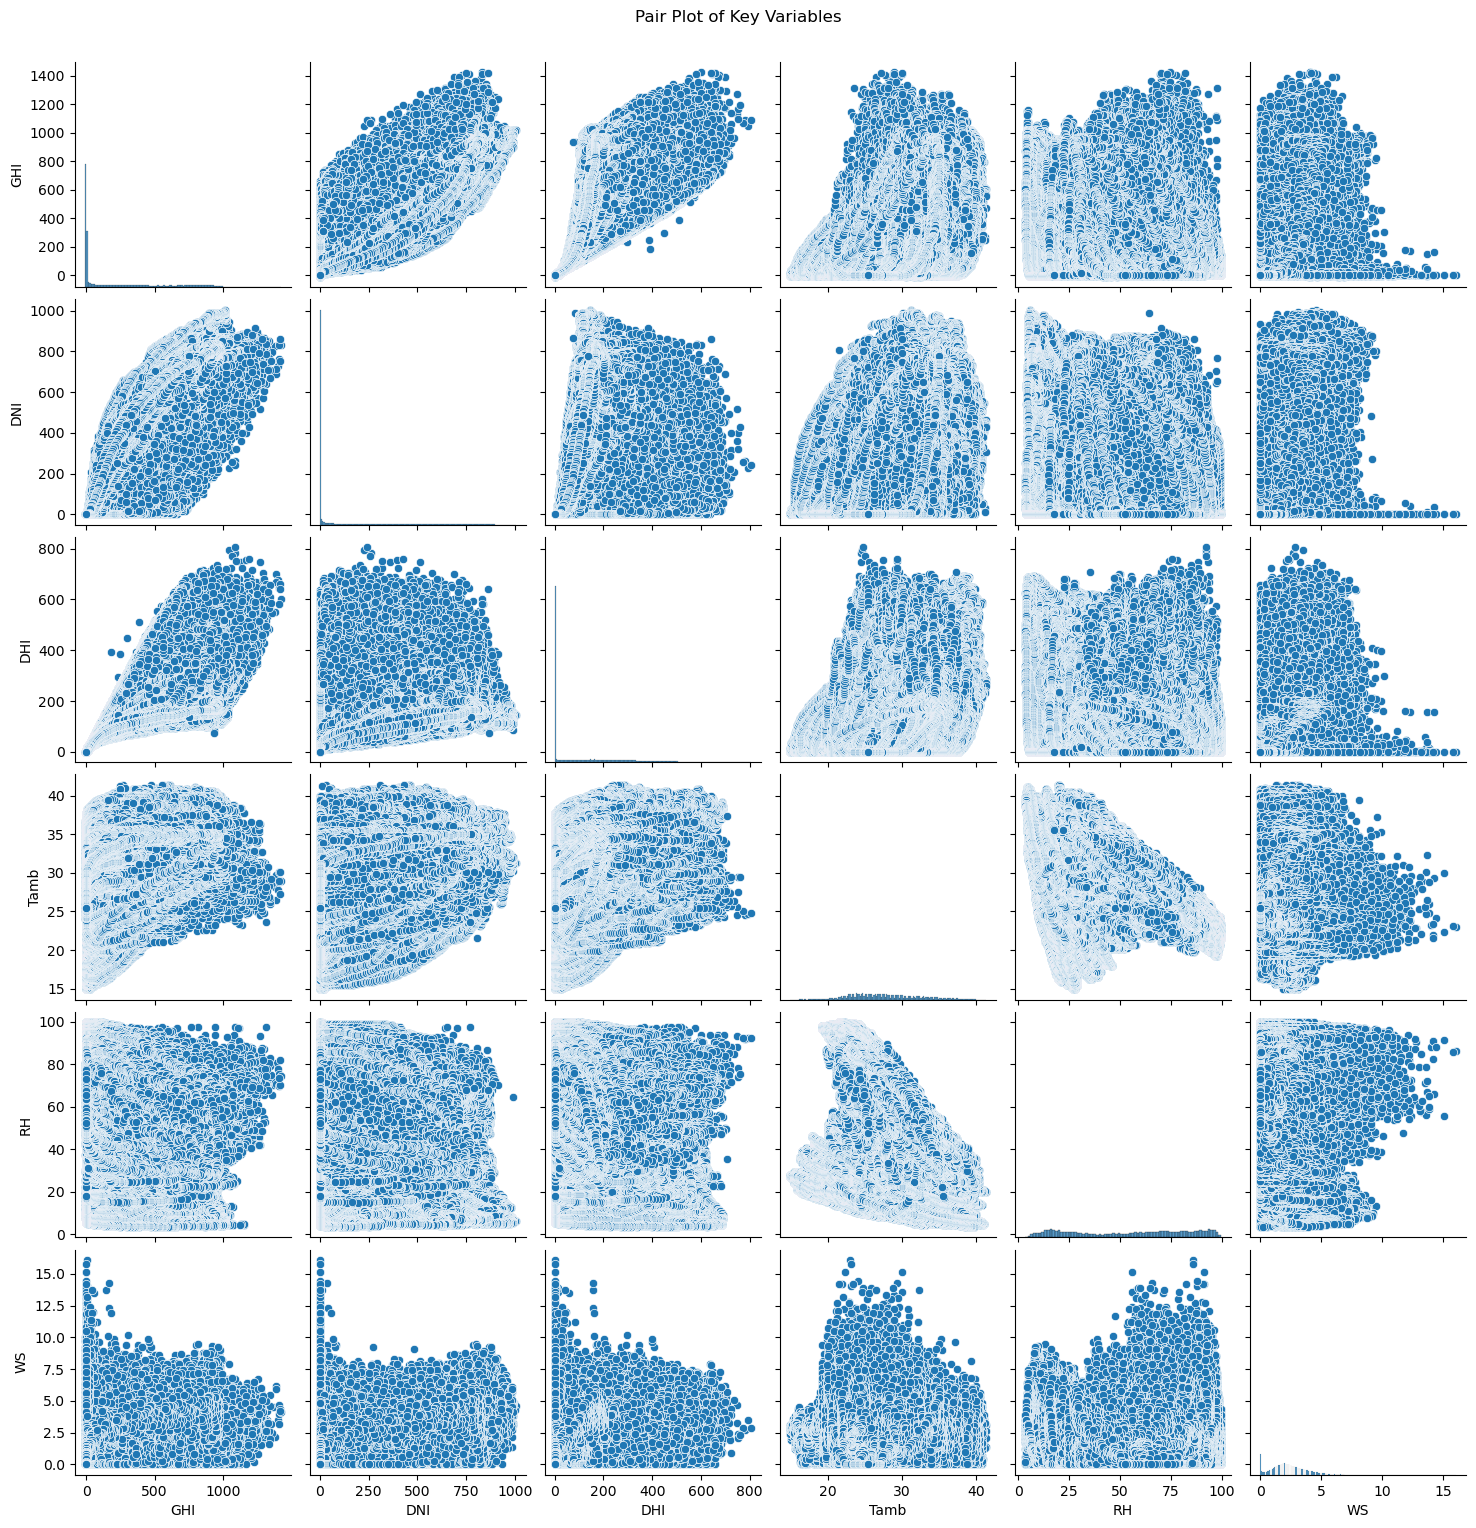

In [23]:
# Generate a pair plot
sns.pairplot(df[['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS']])
plt.suptitle('Pair Plot of Key Variables', y=1.02)
plt.show()

In [24]:
# Identify strong correlations
correlation_matrix = df[['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS']].corr()

# Correlation Matrix
correlation_matrix

,GHI,DNI,DHI,Tamb,RH,WS
GHI,1.000000,0.877006,0.851601,0.561232,-0.254597,0.418635
DNI,0.877006,1.000000,0.531475,0.503316,-0.325629,0.364054
DHI,0.851601,0.531475,1.000000,0.488047,-0.150599,0.387028
Tamb,0.561232,0.503316,0.488047,1.000000,-0.396107,0.190635
RH,-0.254597,-0.325629,-0.150599,-0.396107,1.000000,-0.137423
WS,0.418635,0.364054,0.387028,0.190635,-0.137423,1.000000
